In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import soundfile as sf
sig, samplerate = sf.read('desktop/myThesis/DATASET/300_P/300_AUDIO.wav')
# samplerate, data = wavfile.read("desktop/myThesis/DATASET/300_P/300_AUDIO.wav")

In [2]:
sig.shape


(10376000,)

In [3]:
samplerate

16000

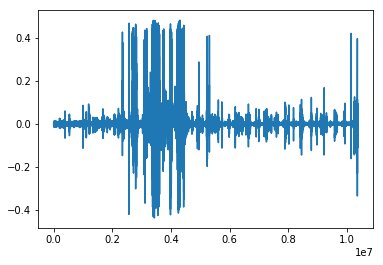

In [4]:
plt.plot(sig);

In [5]:
sig.dtype

dtype('float64')

In [6]:
round(sig.shape[0])/float(samplerate)

648.5

In [7]:
sig = sig/np.power(2,15)

In [8]:
sig = sig[:100]

In [9]:
time_axis = 1000*np.arange(0, len(sig), 1) / float(samplerate)

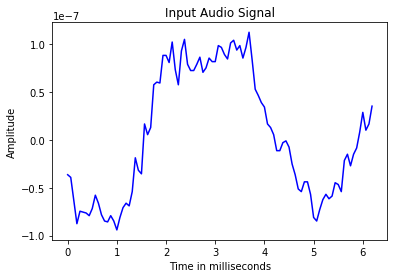

In [10]:
plt.plot(time_axis, sig, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Input Audio Signal')
plt.show()

In [11]:
length_signal = len(sig)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

In [12]:
signal_frequency = np.fft.fft(sig)

In [13]:
signal_frequency = abs(signal_frequency[0:half_length]) /length_signal
signal_frequency **= 2

In [14]:
len_fts = len(signal_frequency)

In [15]:
if length_signal % 2:
    signal_frequency[1:len_fts]*=2
else:
    signal_frequency[1:len_fts-1]*=2

In [16]:
signal_power = 10* np.log10(signal_frequency)

In [17]:
x_axis = np.arange(0,half_length,1)*(samplerate/length_signal/1000)

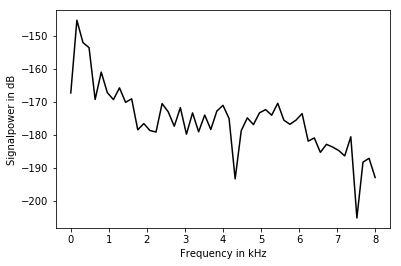

In [18]:
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency in kHz')
plt.ylabel('Signalpower in dB')
plt.show()

In [19]:
from python_speech_features import mfcc, logfbank

In [20]:
sig = sig[:15000]

In [21]:
features_mfcc = mfcc(sig, samplerate)

In [22]:
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 1
Length of each feature = 13


In [23]:
features_mfcc = features_mfcc.T

Text(0.5,1.05,'MFCC')

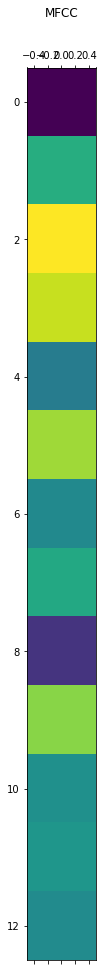

In [24]:
plt.matshow(features_mfcc)
plt.title('MFCC')

In [25]:
filterbank_features = logfbank(sig, samplerate)

In [26]:
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])


Filter bank:
Number of windows = 1
Length of each feature = 26


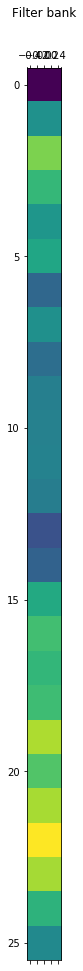

In [27]:
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

In [31]:
# import speech_recognition as sr

In [32]:
# dir(sr)

['AudioData',
 'AudioFile',
 'AudioSource',
 'HTTPError',
 'Microphone',
 'PortableNamedTemporaryFile',
 'Recognizer',
 'Request',
 'RequestError',
 'URLError',
 'UnknownValueError',
 'WaitTimeoutError',
 'WavFile',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'aifc',
 'audioop',
 'base64',
 'collections',
 'get_flac_converter',
 'hashlib',
 'hmac',
 'io',
 'json',
 'math',
 'os',
 'platform',
 'recognize_api',
 'shutil_which',
 'stat',
 'subprocess',
 'sys',
 'threading',
 'time',
 'urlencode',
 'urlopen',
 'uuid',
 'wave']

In [38]:
# recording = sr.Recognizer()

In [50]:
# with sr.Microphone() as source:
# recording.adjust_for_ambient_noise(source)
#     print("Please say something:")
#     audio = recording.listen(source)

IndentationError: expected an indented block (<ipython-input-50-85d6a3c8ec02>, line 2)

In [47]:
# try:
#     print('You said: \n' + recording.recognize_google(audio))
# except Exception as e:
#     print(e)

name 'audio' is not defined


In [25]:
import speech_recognition as sr
r = sr.Recognizer()

with sr.Microphone() as source:  # use the default microphone as the audio source
    print('Speak anything :')
    audio = r.listen(source)                   # listen for the first phrase and extract it into audio data
try:
    print("You said :" + r.recognize_google(audio))    # recognize speech using Google Speech Recognition
except LookupError:                            # speech is unintelligible
    print("Could not understand audio")

Speak anything :
You said :hello


In [27]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.WavFile("desktop/myThesis/DATASET/300_P/300_AUDIO.wav") as source:              # use "test.wav" as the audio source
    audio = r.record(source)                        # extract audio data from the file

try:
    print("Transcription: " + r.recognize_google(audio))   # recognize speech using Google Speech Recognition
except LookupError:                                 # speech is unintelligible
    print("Could not understand audio")

UnknownValueError: 